In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np
from geopy.distance import geodesic
import matplotlib.pyplot as plt
import requests

# Mount Google Drive
drive.mount('/content/drive')

# Define file paths
folder_path = "/content/drive/My Drive/Adv Comp/"
csv_path1 = folder_path + "202501-citibike-tripdata_1.csv"
csv_path2 = folder_path + "NYCgov_Poverty_Measure_Data__2018__20250205.csv"

# Load CSV files (Fix DtypeWarning with low_memory=False)
df1 = pd.read_csv(csv_path1, low_memory=False)
df2 = pd.read_csv(csv_path2, low_memory=False)

# -------- Step 1: Fetch NYC Open Data API --------
api_url = "https://data.cityofnewyork.us/api/odata/v4/i4gi-tjb9"
response = requests.get(api_url)

# Check if API call is successful
if response.status_code == 200:
    data = response.json().get('value', [])
    df_api = pd.DataFrame(data)
    print(f"\nSuccessfully fetched {len(df_api)} records from NYC Open Data API.")
else:
    print("\nFailed to fetch data from API. Status code:", response.status_code)
    df_api = pd.DataFrame()  # Empty DataFrame if API fails


Mounted at /content/drive

Successfully fetched 1000 records from NYC Open Data API.


In [ ]:
# Display the first few rows of each DataFrame
print("Citi Bike Data:")
print(df1.head())

print("\nNYC Poverty Data:")
print(df2.head())

print("\nNYC Open Data API Data:")
print(df_api.head())


Citi Bike Data:
            ride_id  rideable_type               started_at  \
0  56BD148A05E26915  electric_bike  2025-01-01 22:19:06.324   
1  700CCCDF00C08077  electric_bike  2025-01-09 15:20:43.991   
2  B1A3FAFA5FE651CE  electric_bike  2025-01-01 12:54:26.571   
3  9CB0F28054BA5EBC  electric_bike  2025-01-14 13:43:59.151   
4  A1B8FDD4FAF0C2B2  electric_bike  2025-01-13 07:20:37.176   

                  ended_at     start_station_name start_station_id  \
0  2025-01-01 22:23:32.899        W 36 St & 7 Ave          6483.06   
1  2025-01-09 15:26:19.137     Broadway & E 19 St          5980.11   
2  2025-01-01 13:03:03.565    Jackson Ave & 46 Rd          6203.02   
3  2025-01-14 13:49:04.543     Broadway & E 19 St          5980.11   
4  2025-01-13 07:29:18.015  Willis Ave & E 143 St          7798.02   

         end_station_name end_station_id  start_lat  start_lng    end_lat  \
0         W 24 St & 7 Ave        6257.03  40.752149 -73.989539  40.744876   
1         W 24 St & 7 Ave     


First few IDs from Citibike dataset:
0    56BD148A05E26915
1    700CCCDF00C08077
2    B1A3FAFA5FE651CE
3    9CB0F28054BA5EBC
4    A1B8FDD4FAF0C2B2
Name: ride_id, dtype: object

First few IDs from Poverty dataset:
0    1
1    1
2    1
3    1
4    1
Name: Povunit_ID, dtype: int64

First few IDs from API data:
0    row-e4uh-6bbh.iszf
1    row-rdib~j6ri.qmpn
2    row-32we~sa76.w6zu
3    row-6p9a~8jvr_9da5
4    row-mzmg-9rr5.pr8x
Name: __id, dtype: object


In [ ]:
# Display all column names for each dataset
print("Citi Bike Data Columns:")
print(df1.columns.tolist())

print("\nNYC Poverty Data Columns:")
print(df2.columns.tolist())

print("\nNYC Open Data API Columns:")
print(df_api.columns.tolist())


Citi Bike Data Columns:
['ride_id', 'rideable_type', 'started_at', 'ended_at', 'start_station_name', 'start_station_id', 'end_station_name', 'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng', 'member_casual', 'trip_duration_hrs']

NYC Poverty Data Columns:
['SERIALNO', 'SPORDER', 'PWGTP', 'WGTP', 'AGEP', 'CIT', 'REL', 'SCH', 'SCHG', 'SCHL', 'SEX', 'ESR', 'LANX', 'ENG', 'MSP', 'MAR', 'WKW', 'WKHP', 'DIS', 'JWTR', 'NP', 'TEN', 'HHT', 'AgeCateg', 'Boro', 'CitizenStatus', 'EducAttain', 'EST_Childcare', 'EST_Commuting', 'EST_EITC', 'EST_FICAtax', 'EST_HEAP', 'EST_Housing', 'EST_IncomeTax', 'EST_MOOP', 'EST_Nutrition', 'EST_PovGap', 'EST_PovGapIndex', 'Ethnicity', 'FamType_PU', 'FTPTWork', 'INTP_adj', 'MRGP_adj', 'NYCgov_Income', 'NYCgov_Pov_Stat', 'NYCgov_REL', 'NYCgov_Threshold', 'Off_Pov_Stat', 'Off_Threshold', 'OI_adj', 'PA_adj', 'Povunit_ID', 'Povunit_Rel', 'PreTaxIncome_PU', 'RETP_adj', 'RNTP_adj', 'SEMP_adj', 'SSIP_adj', 'SSP_adj', 'TotalWorkHrs_PU', 'WAGP_adj']

NYC Op

In [ ]:
# Show first five rows of each dataset
print("\nCiti Bike Data Sample:")
print(df1.head())

print("\nNYC Poverty Data Sample:")
print(df2.head())

print("\nNYC Open Data API Sample:")
print(df_api.head())



Citi Bike Data Sample:
            ride_id  rideable_type              started_at  \
0  56BD148A05E26915  electric_bike 2025-01-01 22:19:06.324   
1  700CCCDF00C08077  electric_bike 2025-01-09 15:20:43.991   
2  B1A3FAFA5FE651CE  electric_bike 2025-01-01 12:54:26.571   
3  9CB0F28054BA5EBC  electric_bike 2025-01-14 13:43:59.151   
4  A1B8FDD4FAF0C2B2  electric_bike 2025-01-13 07:20:37.176   

                 ended_at     start_station_name start_station_id  \
0 2025-01-01 22:23:32.899        W 36 St & 7 Ave          6483.06   
1 2025-01-09 15:26:19.137     Broadway & E 19 St          5980.11   
2 2025-01-01 13:03:03.565    Jackson Ave & 46 Rd          6203.02   
3 2025-01-14 13:49:04.543     Broadway & E 19 St          5980.11   
4 2025-01-13 07:29:18.015  Willis Ave & E 143 St          7798.02   

         end_station_name end_station_id  start_lat  start_lng    end_lat  \
0         W 24 St & 7 Ave        6257.03  40.752149 -73.989539  40.744876   
1         W 24 St & 7 Ave        6

Average Citi Bike Speed: 11.75 km/h
Average NYC Traffic Speed: 28.10 km/h


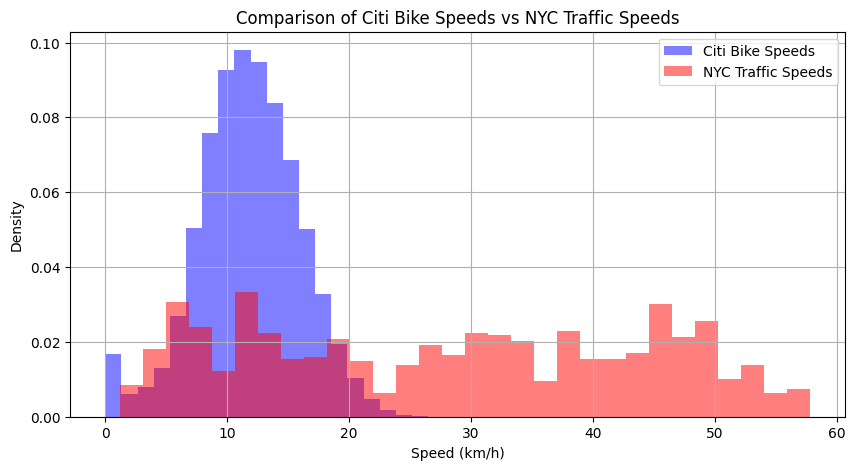

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from geopy.distance import geodesic

# ---- Step 1: Compute Citi Bike Speed ----
# Define function to calculate distance
def calculate_distance(row):
    start = (row['start_lat'], row['start_lng'])
    end = (row['end_lat'], row['end_lng'])
    return geodesic(start, end).km if pd.notnull(row['end_lat']) else np.nan

# Apply distance function
df1['distance_km'] = df1.apply(calculate_distance, axis=1)

# Compute speed (km/hr)
df1['speed_kmh'] = df1['distance_km'] / df1['trip_duration_hrs']

# Filter out unrealistic speeds (>50 km/h, considering urban cycling)
df1 = df1[df1['speed_kmh'] < 50]

# Compute Citi Bike average speed
avg_citibike_speed = df1['speed_kmh'].mean()
print(f"Average Citi Bike Speed: {avg_citibike_speed:.2f} km/h")

# ---- Step 2: Extract Speed from NYC Open Data ----
df_api['speed'] = pd.to_numeric(df_api['speed'], errors='coerce')

# Compute NYC speed statistics
avg_nyc_speed = df_api['speed'].mean()
print(f"Average NYC Traffic Speed: {avg_nyc_speed:.2f} km/h")

# ---- Step 3: Plot the Speed Comparison ----
plt.figure(figsize=(10, 5))

# Histogram of Citi Bike Speeds
plt.hist(df1['speed_kmh'], bins=30, alpha=0.5, label='Citi Bike Speeds', color='blue', density=True)

# Histogram of NYC Traffic Speeds
plt.hist(df_api['speed'].dropna(), bins=30, alpha=0.5, label='NYC Traffic Speeds', color='red', density=True)

# Labels & Legend
plt.xlabel("Speed (km/h)")
plt.ylabel("Density")
plt.title("Comparison of Citi Bike Speeds vs NYC Traffic Speeds")
plt.legend()
plt.grid(True)

# Show plot
plt.show()


In [ ]:
print("\nCiti Bike Data Info:")
print(df1.info())

print("\nNYC Poverty Data Info:")
print(df2.info())

print("\nNYC Open Data API Info:")
print(df_api.info())



Citi Bike Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 14 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   ride_id             1000000 non-null  object        
 1   rideable_type       1000000 non-null  object        
 2   started_at          1000000 non-null  datetime64[ns]
 3   ended_at            1000000 non-null  datetime64[ns]
 4   start_station_name  999700 non-null   object        
 5   start_station_id    999700 non-null   object        
 6   end_station_name    998081 non-null   object        
 7   end_station_id      997876 non-null   object        
 8   start_lat           1000000 non-null  float64       
 9   start_lng           1000000 non-null  float64       
 10  end_lat             999866 non-null   float64       
 11  end_lng             999866 non-null   float64       
 12  member_casual       1000000 non-null  object     

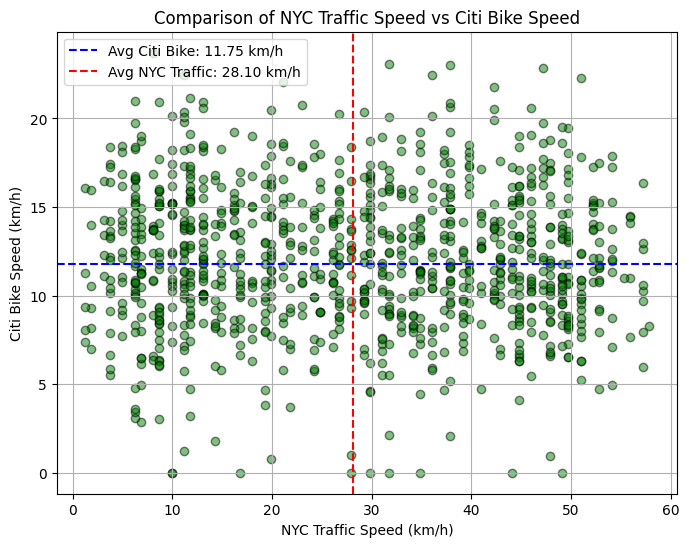

In [ ]:
# ---- Prepare for Scatter Plot ----
# Sample data to ensure equal-sized datasets
min_size = min(len(df1), len(df_api))
sample_citibike = df1['speed_kmh'].sample(min_size, random_state=42)
sample_nyc = df_api['speed'].sample(min_size, random_state=42)

# ---- Scatter Plot ----
plt.figure(figsize=(8, 6))
plt.scatter(sample_nyc, sample_citibike, alpha=0.5, color='green', edgecolors='black')

# Labels & Formatting
plt.xlabel("NYC Traffic Speed (km/h)")
plt.ylabel("Citi Bike Speed (km/h)")
plt.title("Comparison of NYC Traffic Speed vs Citi Bike Speed")
plt.axhline(avg_citibike_speed, color='blue', linestyle='dashed', label=f'Avg Citi Bike: {avg_citibike_speed:.2f} km/h')
plt.axvline(avg_nyc_speed, color='red', linestyle='dashed', label=f'Avg NYC Traffic: {avg_nyc_speed:.2f} km/h')
plt.legend()
plt.grid(True)

# Show plot
plt.show()


<ipython-input-13-b08916c165ba>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['started_at'] = pd.to_datetime(df1['started_at'])
<ipython-input-13-b08916c165ba>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['time_slot'] = (df1['started_at'].dt.hour // 2) * 2


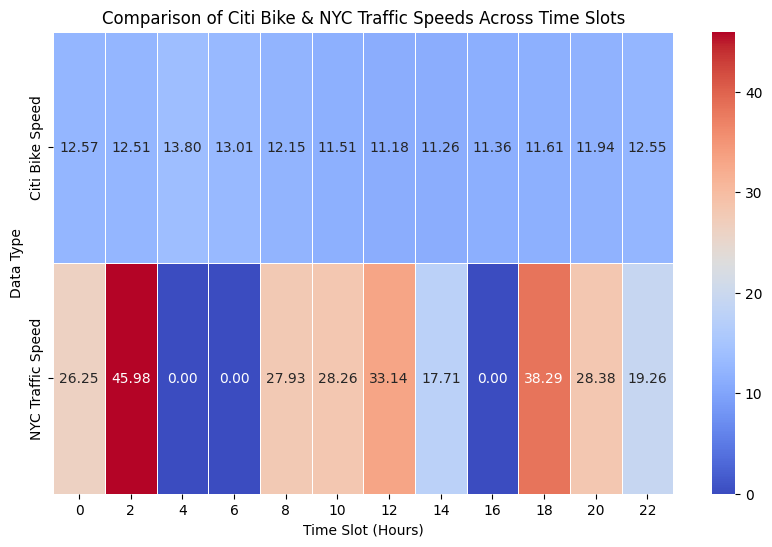

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'started_at' to datetime format if not already
df1['started_at'] = pd.to_datetime(df1['started_at'])

# Extract hour and create 2-hour slots
df1['time_slot'] = (df1['started_at'].dt.hour // 2) * 2

# Group by time slot and calculate average Citi Bike speed
citibike_heatmap_data = df1.groupby('time_slot')['speed_kmh'].mean().reset_index()

# Process NYC Traffic Speed Data
df_api['data_as_of'] = pd.to_datetime(df_api['data_as_of'], errors='coerce')  # Convert to datetime
df_api.dropna(subset=['data_as_of'], inplace=True)  # Drop NaT values
df_api['time_slot'] = (df_api['data_as_of'].dt.hour // 2) * 2  # Create 2-hour time slots

# Convert 'speed' to numeric
df_api['speed'] = pd.to_numeric(df_api['speed'], errors='coerce')

# Group by time slot and calculate average NYC traffic speed
nyc_heatmap_data = df_api.groupby('time_slot')['speed'].mean().reset_index()

# Merge both datasets for a combined heatmap
combined_heatmap_data = pd.merge(citibike_heatmap_data, nyc_heatmap_data, on="time_slot", how="outer")
combined_heatmap_data = combined_heatmap_data.fillna(0)  # Fill missing values with 0

# Reshape for heatmap plotting
combined_pivot = combined_heatmap_data.set_index('time_slot')

# Plot heatmap for Citi Bike and NYC Traffic Speeds
plt.figure(figsize=(10, 6))
sns.heatmap(combined_pivot.T, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5,
            xticklabels=True, yticklabels=['Citi Bike Speed', 'NYC Traffic Speed'])
plt.xlabel("Time Slot (Hours)")
plt.ylabel("Data Type")
plt.title("Comparison of Citi Bike & NYC Traffic Speeds Across Time Slots")
plt.show()


In [ ]:
# Install geopandas if it's not already installed
!pip install geopandas
# Import the necessary libraries
# Import necessary libraries
import geopandas as gpd
import matplotlib.pyplot as plt





DataSourceError: /content/drive/My Drive/Adv Comp/nycshp/nynta202.shp: No such file or directory

In [ ]:
from google.colab import files

# Upload the shapefile (.shp, .shx, .dbf, etc.)
uploaded = files.upload()


Saving nynta2020.shp to nynta2020.shp


In [ ]:
from google.colab import files

# Upload the shapefile (.shp, .shx, .dbf, etc.)
uploaded = files.upload()

Saving nynta2020.shx to nynta2020.shx


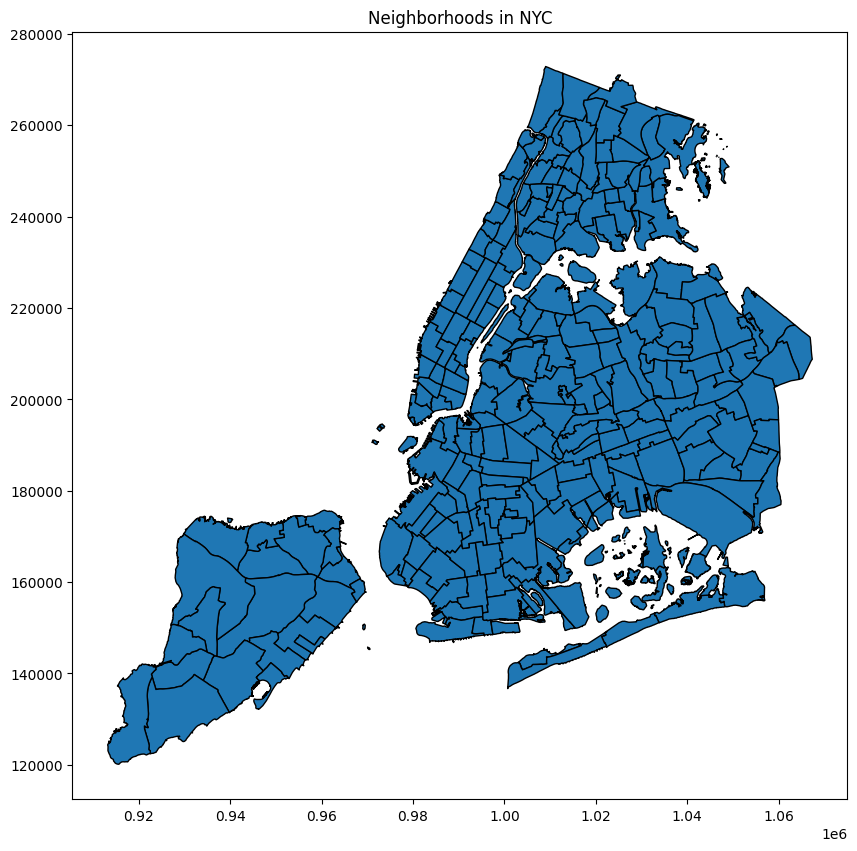

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the uploaded shapefile
shapefile_path = '/content/nynta2020.shp'  # Adjust if the filename is different

# Load the shapefile using Geopandas
gdf = gpd.read_file(shapefile_path)

# Display the shapefile to verify it's loaded correctly
gdf.plot(figsize=(10, 10), edgecolor='black')
plt.title("Neighborhoods in NYC")
plt.show()
